<a href="https://colab.research.google.com/github/kat-tian/Machine-Learning-Practice/blob/master/insight_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cancer Prediction 
Kat Tian 


### Table of Contents 

>[Cancer Prediction](#scrollTo=xE2jWQs7gtdH)

>>[Cleanup Data](#scrollTo=-8zGBpoHfddE)

>>[Investigate Data](#scrollTo=23MuhGTShPi9)

>>>[Sanity Check](#scrollTo=Qc-rGFcYXW6c)

>>[Baseline Model (Logistic)](#scrollTo=92wZVIOA1Akh)

>>>[Build Baseline](#scrollTo=BLCkQHtVXrJt)

>>>[Validate Baseline](#scrollTo=6UH3IjmhWUR4)

>>[Comparison Models](#scrollTo=tRDkHtfkdgkh)

>>>[Logistic](#scrollTo=8vEdJ3h7hj9e)

>>>[SVM](#scrollTo=w8PgJwbrhqQ_)

>>>[SVM with GridSearch](#scrollTo=mEUJWANCkYGq)



In [0]:
#standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#model imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

#visualization imports
import seaborn as sns
from yellowbrick.features import RadViz
from yellowbrick.features import Rank1D
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.target import ClassBalance
from yellowbrick.classifier import PrecisionRecallCurve

In [0]:
col_names = ["ID", "Clump_Thickness", "Uniformity_Cell_Size", "Uniformity_Cell_Shape", "Marginal_Adhesion",
            "Epithelial_Cell_Size", "Bare_Nuclei", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses",
            "Class"]
data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, names=col_names)

## Cleanup Data

In [5]:
data.sample(2)

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
451,1202253,5,1,1,1,2,1,1,1,1,2
555,1313982,4,3,1,1,2,1,4,8,1,2


In [6]:
#convert bare_nuclei from str to flt
data["Bare_Nuclei"] = pd.to_numeric(data['Bare_Nuclei'],errors='coerce')
data.dtypes

ID                         int64
Clump_Thickness            int64
Uniformity_Cell_Size       int64
Uniformity_Cell_Shape      int64
Marginal_Adhesion          int64
Epithelial_Cell_Size       int64
Bare_Nuclei              float64
Bland_Chromatin            int64
Normal_Nucleoli            int64
Mitoses                    int64
Class                      int64
dtype: object

In [0]:
#encode labels to a to 0,1
cleanup_nums = {4: 1, 2: 0} #1 mal, 0 ben
data["Class"].replace(cleanup_nums, inplace=True)

In [0]:
#check nulls, drop na
data.isnull().sum()
data.isna().sum()
data = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [9]:
#check shape 
print("Data dimensions : {}".format(data.shape))

Data dimensions : (683, 11)


## Investigate Data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/yellowbrick/features/radviz.py:213: RuntimeWarning: invalid value encountered in true_divide
  xy   = (s * row_).sum(axis=0) / row.sum()


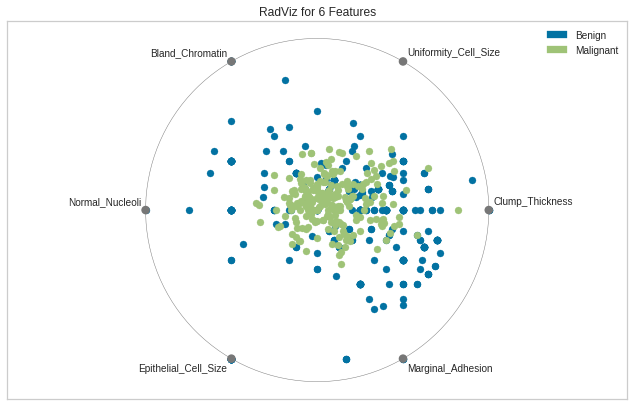

In [10]:
#strip whitespace in columns
data.columns.str.strip()

features = ["Clump_Thickness", "Uniformity_Cell_Size", "Bland_Chromatin", "Normal_Nucleoli", "Epithelial_Cell_Size", "Marginal_Adhesion"]
X = data[features].as_matrix()
y = data.Class.as_matrix()

# Specify the features of interest and the classes of the target 
features = features
classes = ["Benign", "Malignant"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(800,500))
visualizer.fit(X, y)      
visualizer.transform(X)  
visualizer.poof()    

In [0]:
def grid_plot(col1, col2, col3, col4):
  fig, ax =plt.subplots(1,4, figsize=(20,6))

  
  sns.distplot(data.loc[data.Class==1, col1], color="deeppink", label="Malignant", ax=ax[0])
  sns.distplot(data.loc[data.Class==0, col1], color="dodgerblue", label="Benign", ax=ax[0])

  sns.distplot(data.loc[data.Class==1, col2], color="deeppink", label="Malignant", ax=ax[1])
  sns.distplot(data.loc[data.Class==0, col2], color="dodgerblue", label="Benign", ax=ax[1])
  
  
  sns.distplot(data.loc[data.Class==1, col3], color="deeppink", label="Malignant", ax=ax[2])
  sns.distplot(data.loc[data.Class==0, col3], color="dodgerblue", label="Benign", ax=ax[2])
  
  sns.distplot(data.loc[data.Class==1, col4], color="deeppink", label="Malignant", ax=ax[3])
  sns.distplot(data.loc[data.Class==0, col4], color="dodgerblue", label="Benign", ax=ax[3])


  fig.show()

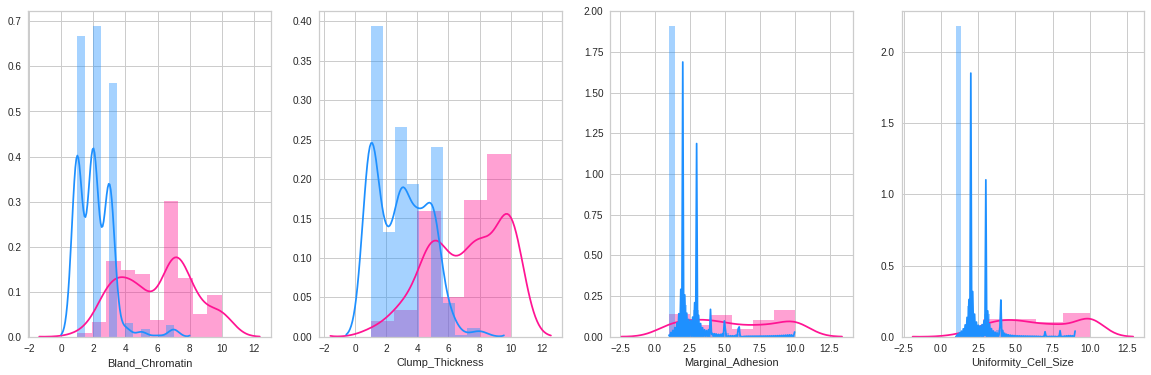

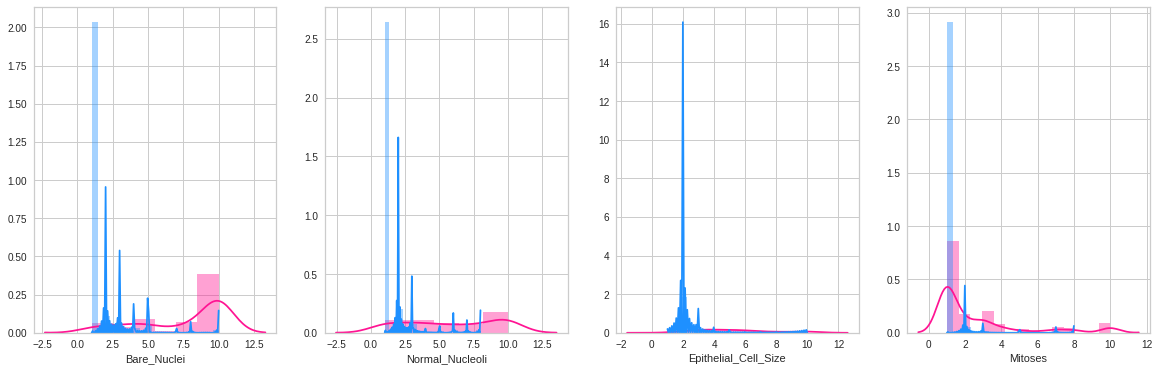

In [62]:
grid_plot("Bland_Chromatin", "Clump_Thickness", "Marginal_Adhesion", "Uniformity_Cell_Size")
grid_plot("Bare_Nuclei", "Normal_Nucleoli", "Epithelial_Cell_Size", "Mitoses")

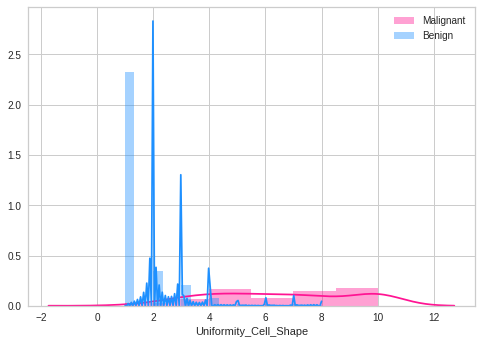

In [13]:
sns.distplot(data.loc[data.Class==1, "Uniformity_Cell_Shape"], color="deeppink", label="Malignant")
sns.distplot(data.loc[data.Class==0, "Uniformity_Cell_Shape"], color="dodgerblue", label="Benign")
plt.legend()

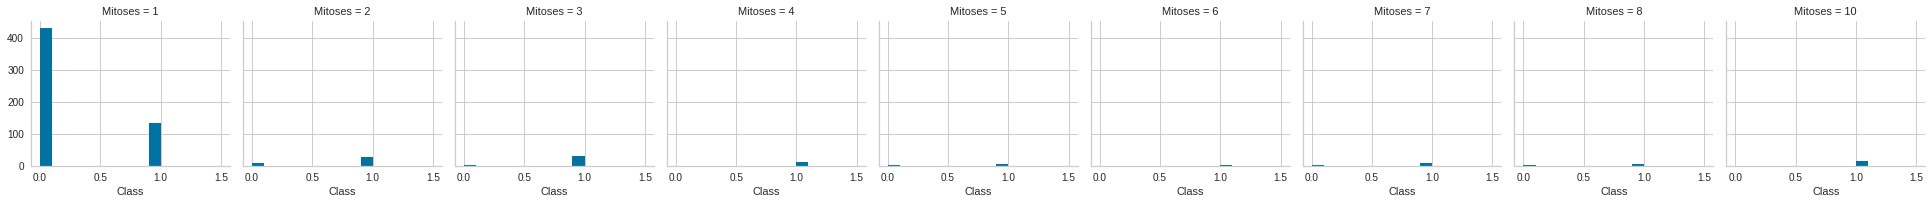

In [14]:
g = sns.FacetGrid(data, col="Mitoses")
g.map(plt.hist, "Class");  

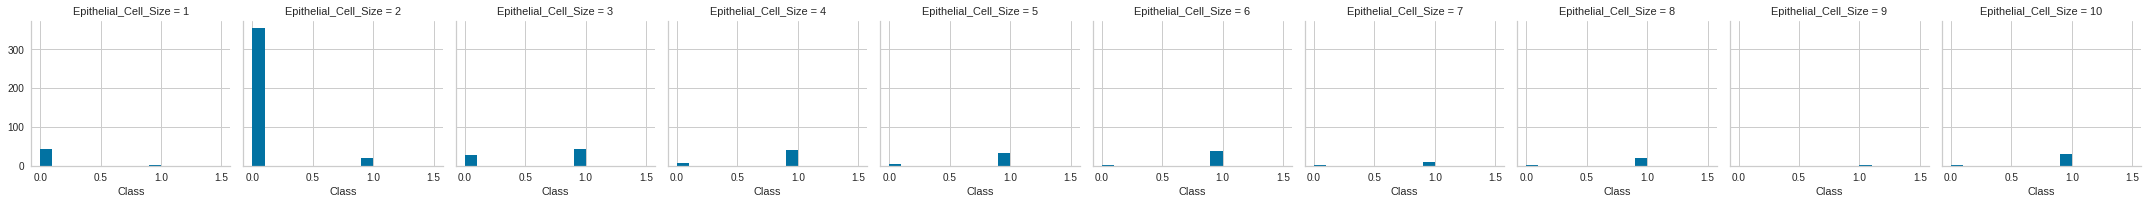

In [15]:
g = sns.FacetGrid(data, col="Epithelial_Cell_Size")
g.map(plt.hist, "Class");  

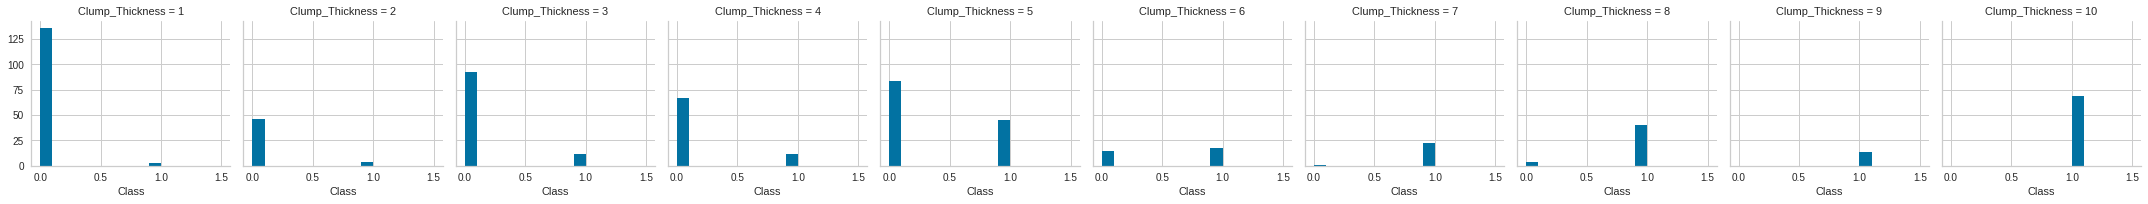

In [16]:
g = sns.FacetGrid(data, col="Clump_Thickness")
g.map(plt.hist, "Class");

### Sanity Check 
Visualize data to see if my intuition makes sense

In [0]:
#define features, labels
X = data.iloc[:, 1:10]
y = data.iloc[:, -1]

/usr/local/lib/python3.6/dist-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


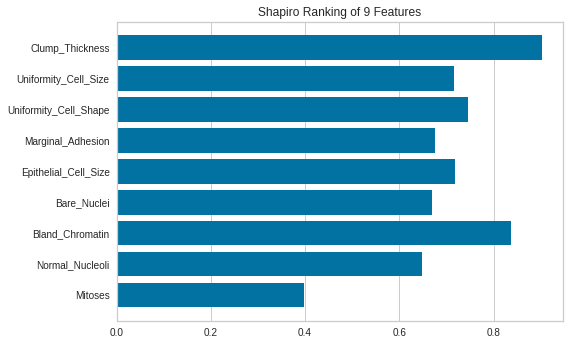

In [18]:
#feature importances, sanity check 
feature_names = ['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
       'Marginal_Adhesion', 'Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses']


# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=feature_names, algorithm='shapiro')
visualizer.fit(X, y)                
visualizer.transform(X)     
visualizer.poof()

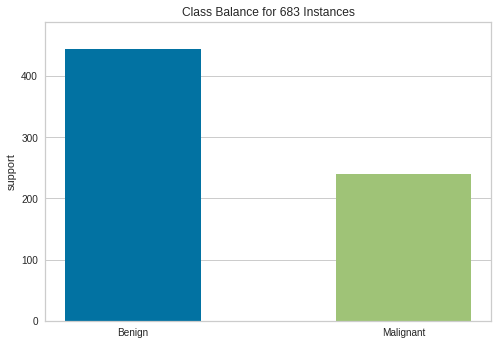

In [19]:
# check class imbalances
visualizer = ClassBalance(labels=["Benign","Malignant"])
visualizer.fit(y)       
visualizer.poof()

## Baseline Model (Logistic)

### Build Baseline

In [0]:
#define features, labels
X = data.iloc[:, 1:10]
y = data.iloc[:, -1]

#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=42)

In [64]:
#define, fit model
model = LogisticRegression(random_state=0).fit(X_train, y_train)

#score model
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9557522123893806

### Validate Baseline

In [0]:
#deine classes
classes = ["Benign","Malignant"]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


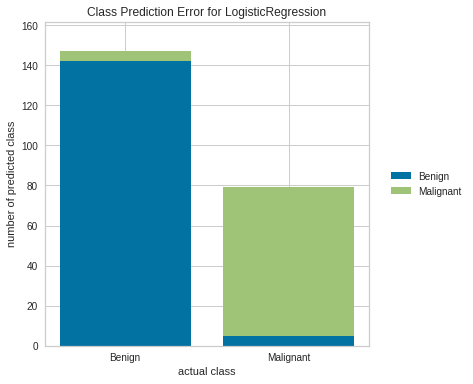

In [66]:
#graph prediction error 
visualizer = ClassPredictionError(
    model, classes=classes)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


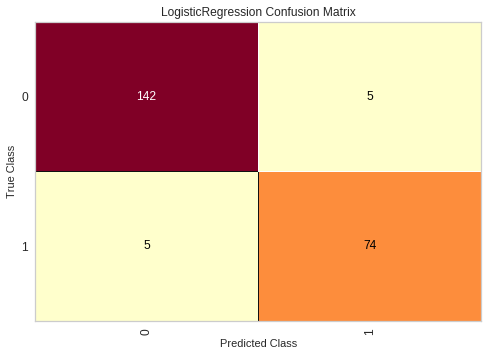

In [67]:
#confusion matrix
visualizer = ConfusionMatrix(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


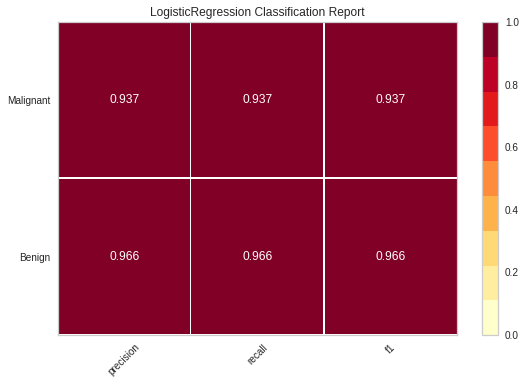

In [68]:
#classification report
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


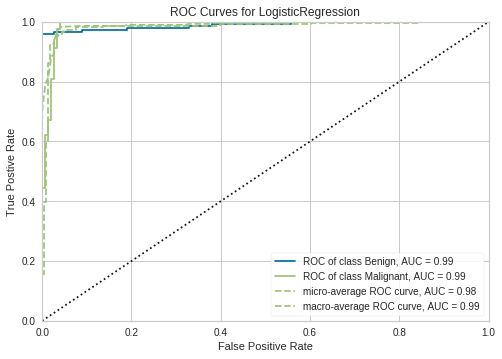

In [69]:
# ROC
visualizer = ROCAUC(model, classes=classes)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)        
g = visualizer.poof()  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


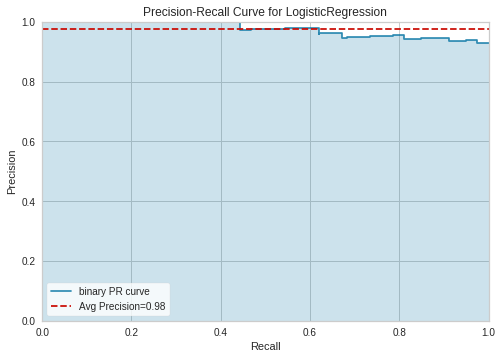

In [70]:
#percision recall 
viz = PrecisionRecallCurve(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()


## Comparison Models

### Logistic 

Update model using the most informative features, performance improves. Recall is better using fewer inputs.

In [0]:
#use most important features
X = data[["Clump_Thickness", "Uniformity_Cell_Size",
       "Uniformity_Cell_Shape", "Marginal_Adhesion", "Epithelial_Cell_Size", "Bland_Chromatin"]]
y = data.iloc[:, -1]

#train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [72]:
#define, fit model
model = LogisticRegression(random_state=0).fit(X_train, y_train)

#score model
model.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9601769911504425

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


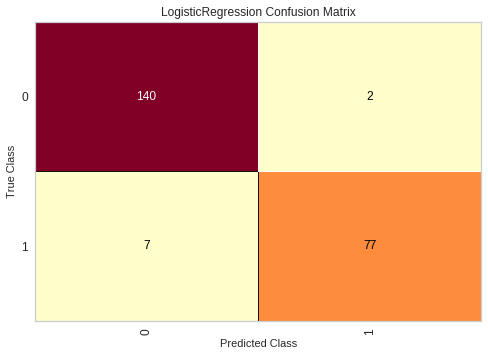

In [73]:
#confusion matrix
visualizer = ConfusionMatrix(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


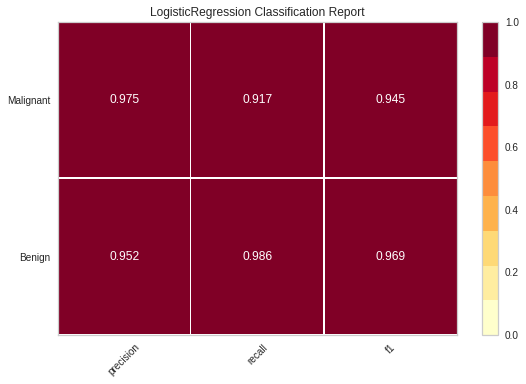

In [74]:
#classification report
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

### SVM
From viusals, it seems that classes may not be lineraly seperable. Using most import features, SVM gives highest accuracy.

In [32]:
#define, fit model
model = SVC(gamma='auto').fit(X_train, y_train)

#score model 
model.score(X_test,y_test)

0.9646017699115044

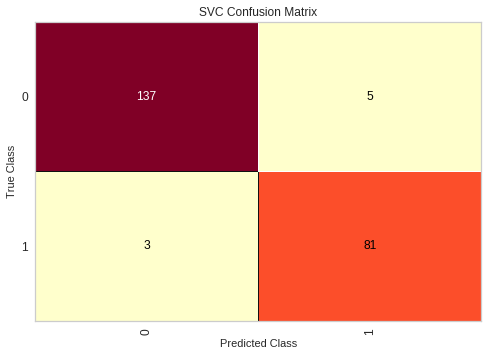

In [33]:
#confusion matrix
visualizer = ConfusionMatrix(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

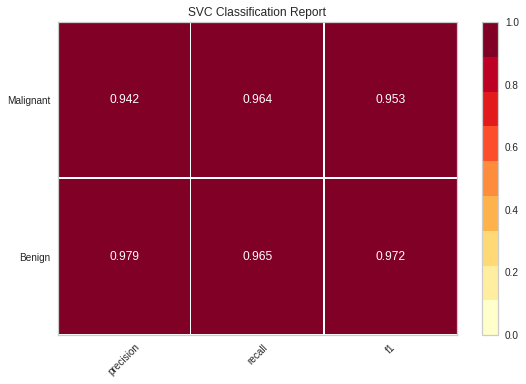

In [34]:
#classification report
visualizer = ClassificationReport(model, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()

### SVM with GridSearch 

In [36]:

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'gamma':[0.001, 0.01, 0.1, 1]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

print("best param values:", clf.best_params_)                        
print("Accuracy:", clf.score(X_test, y_test))
print(" ")


print("Classification Report")
grid_predictions = clf.predict(X_test)  
print(classification_report(y_test, grid_predictions)) 


best param values: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.9734513274336283
 
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       142
           1       0.98      0.95      0.96        84

    accuracy                           0.97       226
   macro avg       0.97      0.97      0.97       226
weighted avg       0.97      0.97      0.97       226



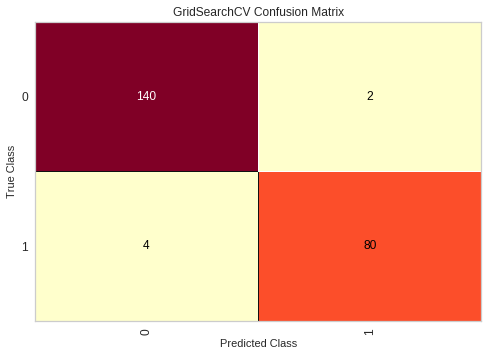

In [37]:
#confusion matrix
visualizer = ConfusionMatrix(clf)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)
g = visualizer.poof()

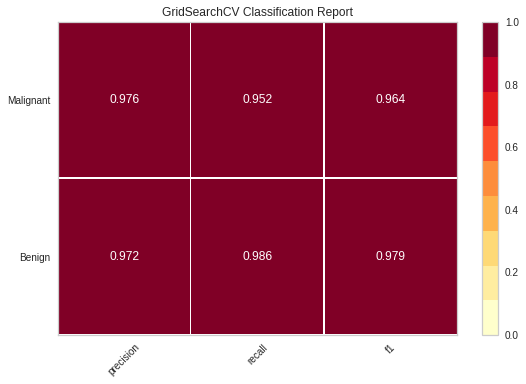

In [38]:
#classification report
visualizer = ClassificationReport(clf, classes=classes)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
g = visualizer.poof()